In [115]:
!pip install fastai

In [116]:
import torch

# CUDA 가용 여부 확인
if torch.cuda.is_available():
    print("CUDA is available. PyTorch is using GPU.")
    print(f"Device: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available. PyTorch is using CPU.")

print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

CUDA is available. PyTorch is using GPU.
Device: NVIDIA L4
0
NVIDIA L4


In [144]:
# 구글 드라이브 파일들 불러오기
from google.colab import drive
#구글 드라이브를 코렙에 연결
drive.mount('/content/drive') #드라이브가 연결될 위치

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:

# 다양한 라이브러리 임포트
import shutil
import pandas as pd #데이터 분석을 쉽게 해주는 도구
import numpy as np #숫자나 수학 계산을 빠르고 효율적으로 할 수 있게 도와주는 도구야. 특히, 배열(array)과 행렬(matrix) 계산에 강함
import seaborn as sns #예쁜 그래프와 차트를 그릴 수 있게 도와주는 도구
import matplotlib.pyplot as plt #파이썬에서 그래프를 그릴 때 기본적으로 사용하는 도구
import os #컴퓨터의 파일이나 폴더를 관리하는 기능을 제공
import random #무작위 숫자나 선택을 할 때 사용하는 도구
import cv2 #미지나 영상을 처리할 때 쓰는 강력한 도구. 얼굴 인식, 사진 필터링 같은 기능을 구현가능
import sklearn #머신러닝 모델을 만들고 평가할 때 쓰는 도구. 데이터 분류, 회귀, 군집화 등의 작업을 지원.
import torch #딥러닝 모델을 만들고 훈련할 때 사용하는 도구. GPU를 사용해 계산을 빠르게 할 수 있음
from PIL import Image # Pillow:이미지를 열거나, 저장하거나, 변환할 때 사용하는 도구
from pathlib import Path # Pathlib: 파일과 폴더 경로를 다루는 도구. 파일의 경로를 쉽게 관리하고 처리
from fastai.vision.all import * #Fastai: 딥러닝을 쉽게 할 수 있도록 도와주는 도구. 특히 이미지 인식 같은 작업을 빠르고 효율적
from fastai.callback import * #Fastai Callback: 학습 과정 중에 특별한 작업을 할 수 있도록 도와주는 도구를 포함. 예를 들어, 학습 중간에 멈추거나, 특정 조건에서만 모델을 저장하는 기능
from fastai.metrics import error_rate #Fastai Metrics: 모델의 성능을 평가하는 도구. 여기서는 error_rate를 사용해 모델의 오류율을 계산
from fastai.callback.tracker import EarlyStoppingCallback #Early Stopping: 모델이 더 이상 발전하지 않을 때, 학습을 조기에 멈추게 도와주는 기능. 시간을 절약
from fastai.vision.all import get_image_files # get_image_files: 특정 폴더에서 이미지 파일만 가져오는 기능
from sklearn.metrics import classification_report # Classification Report: 기계 학습 모델의 성능을 종합적으로 평가하는 리포트를 만들어줌. 정확도, 정밀도, 재현율 등을 보여줌
from sklearn.metrics import confusion_matrix #Confusion Matrix: 모델이 얼마나 정확히 예측했는지 보여주는 표

#	경고 메시지를 무시하도록 설정
import warnings
warnings.filterwarnings ('ignore')

In [165]:
import os

# 경로 설정
drive_dir = "/content/drive/My Drive/Exercise/MLDL/"
model_dir = os.path.join(drive_dir, "Model")
new_dir40000 = drive_dir + "dataset/AI vs Human Generated Images_40000"

# 경로 확인
print("Drive 디렉토리:", drive_dir)
print("Drive 디렉토리 존재 여부:", os.path.exists(drive_dir))
print("모델 디렉토리:", model_dir)
print("모델 디렉토리 존재 여부:", os.path.exists(model_dir))

# 상위 디렉토리 내용 확인
print("상위 디렉토리 내용:", os.listdir(os.path.dirname(drive_dir)))


Drive 디렉토리: /content/drive/My Drive/Exercise/MLDL/
Drive 디렉토리 존재 여부: True
모델 디렉토리: /content/drive/My Drive/Exercise/MLDL/Model
모델 디렉토리 존재 여부: True
상위 디렉토리 내용: ['dataset', 'Resnet34_v1', 'Model', 'model']


In [157]:
new_dir40000

'drive/My Drive/Exercise/MLDL/dataset/AI vs Human Generated Images_40000'

In [158]:
import os
from pathlib import Path

def count_files(directory):
    total_count = 0
    for root, dirs, files in os.walk(directory):
        count = len(files)
        total_count += count
        print(f"{root}: {count} 파일")
    print(f"\n총 파일 개수: {total_count}")

# 데이터셋 경로
path = Path("drive/My Drive/Exercise/MLDL/dataset/AI vs Human Generated Images_40000/train")

# 실제 이미지 폴더
print("실제 이미지 (0_real):")
count_files(path / "0_real")

print("\n가짜 이미지 (1_fake):")
count_files(path / "1_fake")

실제 이미지 (0_real):
drive/My Drive/Exercise/MLDL/dataset/AI vs Human Generated Images_40000/train/0_real: 18000 파일

총 파일 개수: 18000

가짜 이미지 (1_fake):
drive/My Drive/Exercise/MLDL/dataset/AI vs Human Generated Images_40000/train/1_fake: 18000 파일

총 파일 개수: 18000


In [130]:
# 데이터 로드 (훈련과 검증 세트)
dls = ImageDataLoaders.from_folder(
    path,
    train='train',
    valid_pct=0.2,
    get_items=get_items,
    item_tfms=Resize(460),
    batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)],
    num_workers=0  # 멀티프로세싱 비활성화
)

# 샘플 배치 확인
x, y = dls.one_batch()
print(f"배치 크기: {x.shape}")

배치 크기: torch.Size([64, 3, 224, 224])


In [131]:
len(dls.train_ds)

28800

In [132]:
#dls(데이터로더)객체의 검증용 데이터셋에 포함된 이미지 수를 반환하는 명령어
len(dls.valid_ds)

7200

In [133]:
#dls(데이터로더) 객체의 vocab 속성을 출력하는 명령어. 이 속성은 데이터셋에서 사용할 클래스 레이블 목록을 담고 있음
print(dls.vocab)

['0_real', '1_fake']


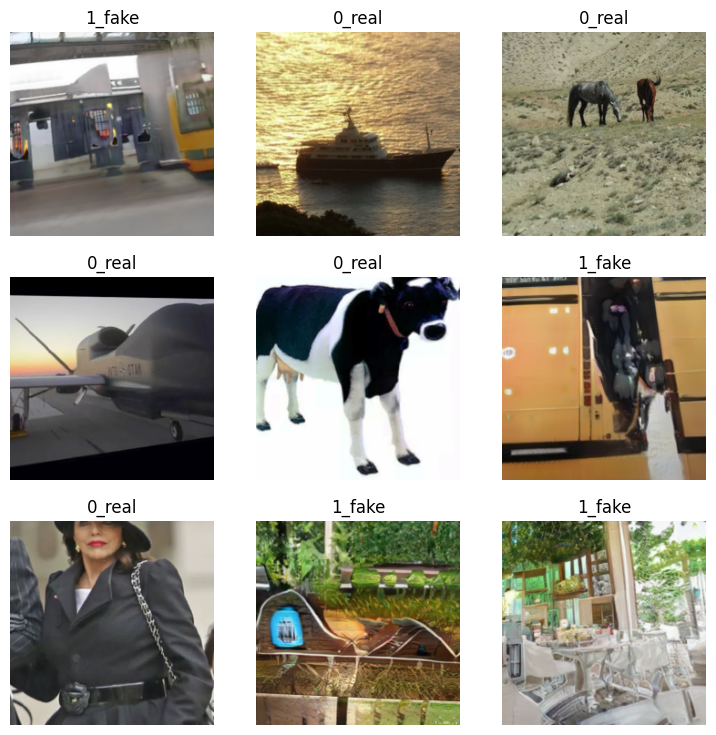

In [19]:
#dls(데이터로더) 객체를 사용하여 배치(batch)의 이미지를 시각적으로 보여주는 명령어. 데이터의 예시를 시각적으로 확인할 때 유용
dls.show_batch()

In [134]:
#이미지 분류 모델을 훈련하기 위한 Learner 객체를 생성하는 과정
learn = vision_learner(dls, resnet34, metrics=accuracy)

In [176]:
def find_model_file(base_path, model_name):
    for root, dirs, files in os.walk(base_path):
        if model_name in files:
            return Path(root) / model_name
    return None

model_name = "ai-generated-images-vs-real-images_v2.pth"
model_path = Path(model_dir) / "ai-generated-images-vs-real-images_v2"

if model_path:
    print(f"모델 파일 찾음: {model_path}")
else:
    print("모델 파일을 찾을 수 없습니다.")

모델 파일 찾음: /content/drive/My Drive/Exercise/MLDL/Model/ai-generated-images-vs-real-images_v2


In [177]:
learn.load("ai-generated-images-vs-real-images_v2")

In [180]:
learn.model_dir = model_dir

In [201]:
learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

## ***결과해석***

모델 아키텍처:

이 모델은 ResNet34를 기반으로 하는 컨볼루션 신경망(CNN)입니다.
입력 이미지 크기는 224x224x3 (RGB 이미지)입니다.


레이어 구성:

여러 개의 컨볼루션 레이어, 배치 정규화 레이어, ReLU 활성화 함수로 구성되어 있습니다.
마지막에는 완전 연결 레이어(Linear)가 있어 최종 분류를 수행합니다.


파라미터 수:

총 파라미터 수: 21,813,056
모든 파라미터가 학습 가능(trainable)합니다.


출력:

최종 출력은 2개의 클래스에 대한 확률 분포입니다 (64 x 2).
이는 이진 분류 작업을 수행하고 있음을 나타냅니다 (예: AI 생성 이미지 vs 실제 이미지).


특징 추출:

모델은 점진적으로 이미지의 특징을 추출합니다. 초기 레이어에서는 64x112x112에서 시작하여 최종적으로 512x7x7 특징 맵을 생성합니다.


풀링:

AdaptiveAvgPool2d와 AdaptiveMaxPool2d를 사용하여 특징 맵의 크기를 조정합니다.


완전 연결 레이어:

1024 -> 512 -> 2의 구조로 되어 있어, 점진적으로 특징을 압축하고 최종 분류를 수행합니다.


규제화:

Dropout 레이어가 사용되어 과적합을 방지합니다.
BatchNorm 레이어가 각 컨볼루션 레이어 후에 사용되어 학습 안정성을 향상시킵니다.


옵티마이저 및 손실 함수:

Adam 옵티마이저를 사용합니다.
손실 함수로 CrossEntropyLoss를 사용합니다.


모델 상태:

모델이 "unfrozen" 상태입니다. 즉, 모든 레이어가 학습 가능합니다.


콜백:

여러 콜백 함수가 사용되어 훈련 과정을 모니터링하고 제어합니다.



이 모델은 복잡한 이미지 분류 작업에 적합한 구조를 가지고 있으며, 전이 학습을 통해 효과적으로 fine-tuning될 수 있습니다. 모든 파라미터가 학습 가능하므로, 새로운 데이터셋에 대해 전체적인 재학습이 가능합니다.

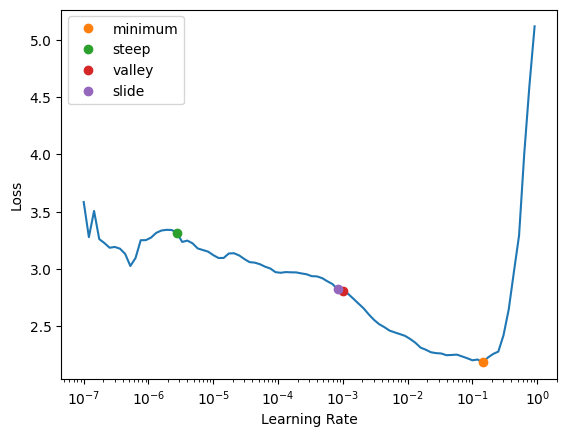

In [179]:
suggest_funcs = (minimum, steep, valley, slide)

lrs = learn.lr_find(suggest_funcs=suggest_funcs)

#1.	suggest_funcs = (minimum, steep, valley, slide):
#suggest_funcs는 학습률을 추천하기 위한 여러 가지 방법들을 담고 있는 변수.

#각각의 함수가 학습률 그래프에서 특정한 패턴을 감지해, 최적의 학습률을 추천함:
#minimum: 학습률 그래프에서 손실이 가장 낮아지는 지점을 찾음.
#steep: 손실이 급격하게 감소하는 지점을 찾음.
#valley: 손실 곡선에서 U자형 모양의 바닥 지점을 찾음.
#slide: 손실이 가장 안정적으로 감소하는 지점을 찾음.

#2.	lrs = learn.lr_find(suggest_funcs=suggest_funcs):
#learn.lr_find()는 Fastai에서 학습률을 찾기 위해 사용되는 함수입니다. 이 함수는 여러 학습률을 시도해보고, 손실(loss) 값을 기반으로 최적의 학습률을 추천.
#suggest_funcs=suggest_funcs를 사용하여, 앞에서 정의한 네 가지 방법을 모두 사용해 최적의 학습률을 추천받음.
#결과는 lrs라는 변수에 저장.

epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time
0,0.709640,0.663859,0.628472,5:52:22
1,0.455177,0.400033,0.827778,07:15
2,0.297260,0.229628,0.905833,07:15
3,0.245518,0.186717,0.925556,07:16
4,0.222898,0.170563,0.934306,07:15


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

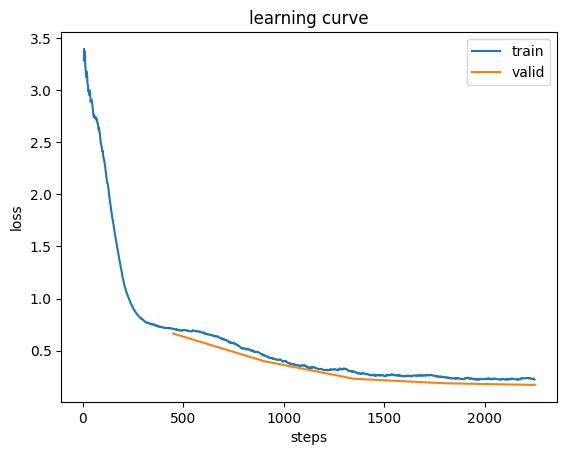

In [181]:
learn.fit_one_cycle(5, lr_max=slice(lrs.valley, lrs.slide))

learn.recorder.plot_loss()

#	1.	learn.fit_one_cycle(5, lr_max=slice(lrs.valley, lrs.slide)):

#learn.fit_one_cycle: Fastai에서 제공하는 학습 함수로, 일정 주기 동안 학습률을 변화시키며 학습을 진행. 이 방법은 모델이 더 빨리 수렴하도록 도와줌.
#5: 학습을 5번 반복(에포크 수).

#lr_max=slice(lrs.valley, lrs.slide):
#lr_max는 학습의 최대 학습률을 설정하는 부분.
#	slice(lrs.valley, lrs.slide)는 최적 학습률을 설정하는 범위를 나타냄.
#이전에 learn.lr_find() 함수로 찾은 두 가지 학습률 (valley와 slide) 사이에서 학습률이 조정됨. 이는 학습의 안정성과 성능을 높이기 위해 사용됨.

# 2.	learn.recorder.plot_loss():
#learn.recorder: 학습 과정에서 손실, 정확도 등의 기록을 보관하는 객체.(이 데이터는 메모리에서만 존재하기 때문에, 코드 실행이 끝나면 사라짐.)
#plot_loss(): 학습 중 기록된 손실 값을 그래프로 시각화. 이 그래프는 학습이 진행되면서 손실이 어떻게 변화했는지 보여줌. 손실이 감소하는 추세라면 학습이 잘 진행되고 있다는 것을 의미.

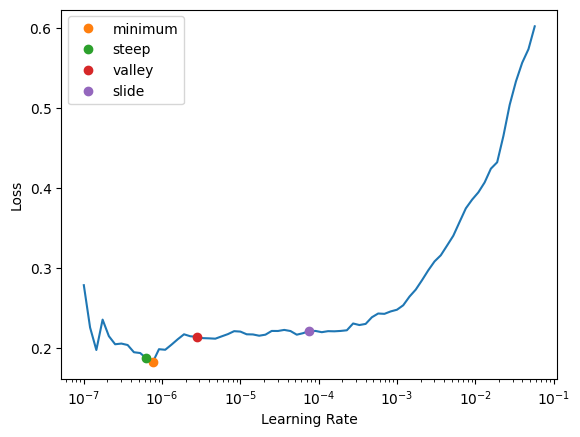

In [182]:
learn.unfreeze()
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

#	unfreeze():
#모델의 모든 층(layer)을 학습 가능하게 만듬.
#초기에는 모델의 일부 층(특히, 선행학습된 모델의 경우)은 동결(freeze)되어 학습되지 않도록 설정됨. 이는 이미 잘 학습된 층을 손상시키지 않고, 모델의 나머지 부분만 학습하기 위함.
#**unfreeze()**를 사용하면, 이전에 동결된 층들도 학습 가능하게 풀어주는 것.
#이렇게 하면 모델 전체가 데이터에 대해 다시 학습할 수 있게 됨.

epoch,train_loss,valid_loss,accuracy,time
0,0.226855,0.168018,0.935833,07:33
1,0.216968,0.149453,0.943194,07:33
2,0.186517,0.132584,0.948611,07:33
3,0.173345,0.119295,0.955833,07:34
4,0.157815,0.106699,0.958611,07:32
5,0.134264,0.098606,0.960972,07:33
6,0.131945,0.092450,0.965556,07:33
7,0.137704,0.087679,0.966806,07:32
8,0.126470,0.089001,0.966667,07:33
9,0.131464,0.087734,0.966667,07:33


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

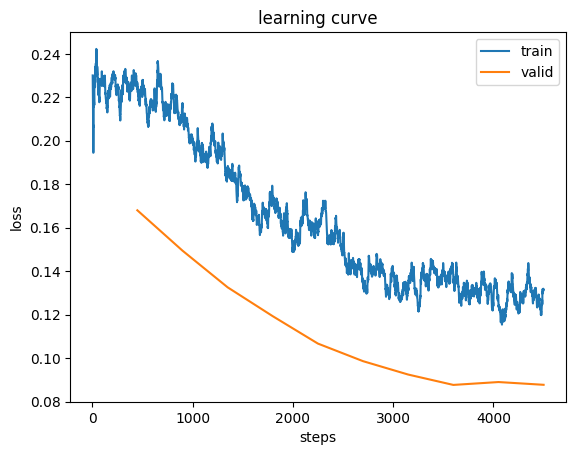

In [183]:
learn.fit_one_cycle(10, lr_max=slice(lrs.valley, lrs.slide))

learn.recorder.plot_loss()

#	learn.fit_one_cycle(10):
# **fit_one_cycle**는 Fastai의 학습 방법 중 하나로, 1 사이클 학습 방법을 사용함. 이 방법은 학습률을 점진적으로 증가시키다가 감소시키는 방식으로 학습을 진행.
# **10**은 학습할 **에포크(epoch)**의 수를 의미. 에포크는 전체 데이터셋을 한 번 통과하는 것을 말한다. 즉, 모델이 전체 데이터셋을 10번 학습하게 된다.

# lr_max=slice(lrs.valley, lrs.slide):
# **lr_max**는 학습률의 범위를 지정. 학습률은 모델의 학습 속도를 조절하는 중요한 하이퍼파라미터.
# **slice(lrs.valley, lrs.slide)**는 앞서 찾은 학습률 값 중 valley와 slide 사이의 범위를 사용하겠다는 의미. 이 범위 내에서 학습률을 조정하면서 학습을 진행.
# **lrs.valley**와 **lrs.slide**는 learn.lr_find()를 통해 찾은 학습률의 시작과 끝을 의미.

In [188]:
# 모델 저장
learn.save('Resnet34_v1')

Path('/content/drive/My Drive/Exercise/MLDL/Model/Resnet34_v1.pth')

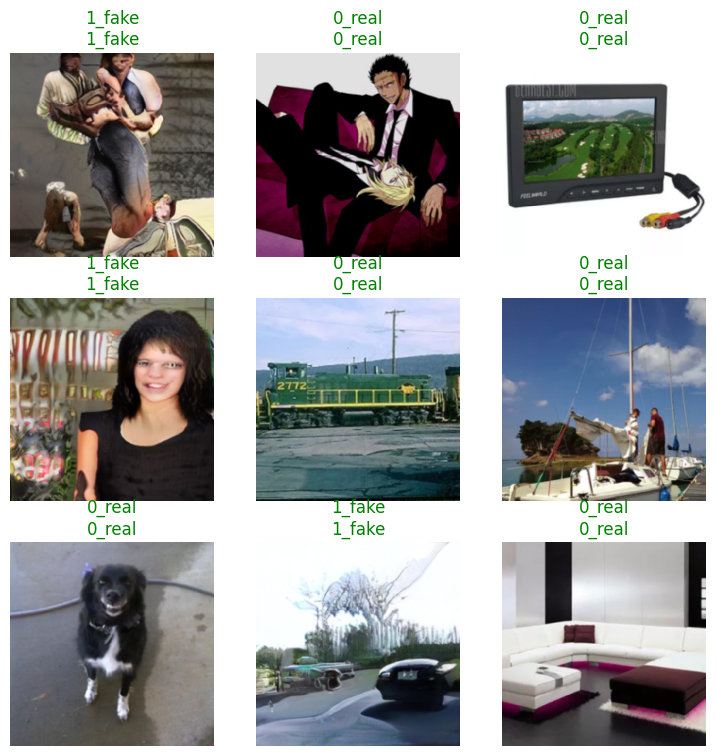

In [184]:
learn.show_results()

Accuracy: 0.9667
Precision: 0.9705
Recall: 0.9642


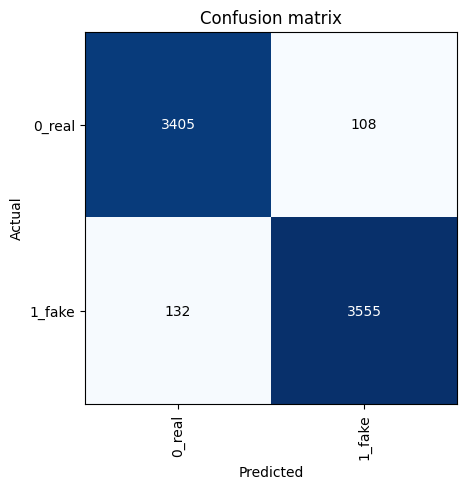

In [185]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# 혼동 행렬 값을 추출
cm = interp.confusion_matrix()

# 혼동 행렬의 각 요소 추출
tn, fp, fn, tp = cm.ravel()

# 정확도 계산
accuracy = (tp + tn) / (tp + tn + fp + fn)

# 정밀도 계산
precision = tp / (tp + fp) if (tp + fp) != 0 else 0

# 재현율 계산
recall = tp / (tp + fn) if (tp + fn) != 0 else 0

# 결과 출력
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

In [204]:
interp.plot_top_losses(30,figsize = (20,15))

#	interp.plot_top_losses():
# **interp**는 이전에 ClassificationInterpretation 객체를 생성한 것으로, 모델의 예측 오류를 분석하는 데 사용됩니다.
#	plot_top_losses() 메서드는 모델이 잘못 예측한 샘플 중에서 가장 많은 손실(loss)을 발생시킨 샘플들을 시각화합니다.

#	매개변수 설명:
#	30:
#	모델이 가장 많이 잘못 예측한 20개의 샘플을 시각화합니다.
#	이 숫자는 원하는 만큼 조정할 수 있습니다. 예를 들어, 상위 10개, 50개 등으로 조정할 수 있습니다.

#	figsize=(20,15):
#	생성되는 시각화의 크기를 조정합니다.
#	**figsize**는 (너비, 높이)를 지정하는 튜플로, 결과 그래프의 가로와 세로 크기를 설정합니다.
#	**(20,15)**는 그래프의 가로가 20인치, 세로가 15인치임을 의미합니다. 크기를 조정하여 더 많은 세부 정보를 한눈에 볼 수 있습니다.

Output hidden; open in https://colab.research.google.com to view.

In [187]:
preds, targets = learn.get_preds()

class_report = classification_report(targets, torch.argmax(preds, dim=1), target_names=dls.vocab)
print(class_report)


              precision    recall  f1-score   support

      0_real       0.96      0.97      0.97      3513
      1_fake       0.97      0.96      0.97      3687

    accuracy                           0.97      7200
   macro avg       0.97      0.97      0.97      7200
weighted avg       0.97      0.97      0.97      7200



## **두 모델이 학습을 달리 했는데 파일 크기가 동일해서 의문을 가짐(혹시 동일한 모델이 아닐까..?)**

In [200]:
#모델 구조확인
learn.load('ai-generated-images-vs-real-images_v2')
print(learn.model)

learn.load('Resnet34_v1')
print(learn.model)

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

Claude1 결과:

두 모델의 구조를 비교해 본 결과, 다음과 같은 결론을 내릴 수 있습니다

동일한 아키텍처: 두 모델은 완전히 동일한 아키텍처를 가지고 있습니다. 둘 다 ResNet34를 기반으로 하며, 마지막 fully connected 레이어가 2개의 출력 뉴런을 가지도록 수정되었습니다. 전이 학습(Transfer Learning) 확인: 동일한 아키텍처를 가지고 있다는 것은 첫 번째 모델('ai-generated-images-vs-real-images_v2')을 기반으로 전이 학습을 수행했음을 의미합니다. 두 번째 모델('Resnet34_v1')은 첫 번째 모델의 가중치를 초기값으로 사용하여 새로운 데이터셋에 대해 fine-tuning 되었을 가능성이 높습니다.

파일 크기가 동일한 이유:

동일한 아키텍처: 두 모델의 구조가 완전히 같기 때문에 파라미터의 수가 동일합니다. 저장 형식의 일관성: PyTorch나 FastAI의 모델 저장 방식이 일관되어 있어, 내부 가중치 값과 관계없이 동일한 구조의 모델은 같은 크기의 파일을 생성합니다. 정밀도 유지: 두 모델 모두 같은 수치 정밀도(예: float32)를 사용하고 있을 것입니다.

주목할 점:

마지막 레이어: 두 모델 모두 마지막 Linear 레이어가 2개의 출력을 가집니다. 이는 이진 분류 작업(예: AI 생성 이미지 vs 실제 이미지)을 수행하고 있음을 나타냅니다. Dropout 레이어: 과적합을 방지하기 위해 Dropout이 사용되었습니다. BatchNorm 레이어: 학습 안정성을 위해 BatchNormalization이 사용되었습니다.

결론적으로, 두 모델은 동일한 아키텍처를 가지고 있으며, 전이 학습을 통해 두 번째 모델이 생성되었을 가능성이 높습니다. 파일 크기가 같은 이유는 모델 구조의 동일성과 저장 형식의 일관성 때문입니다. 그러나 내부 가중치 값은 다를 수 있으며, 이는 각 모델의 성능 평가를 통해 확인할 수 있습니다.

In [199]:
#모델 성능비교
learn.load('ai-generated-images-vs-real-images_v2')
params1 = [p.data.clone() for p in learn.model.parameters()]

learn.load('Resnet34_v1')
params2 = [p.data for p in learn.model.parameters()]

for i, (p1, p2) in enumerate(zip(params1, params2)):
    if not torch.allclose(p1, p2, atol=1e-5):
        print(f"Parameter {i} is different")
    else:
        print(f"Parameter {i} is the same")

Parameter 0 is different
Parameter 1 is different
Parameter 2 is different
Parameter 3 is different
Parameter 4 is different
Parameter 5 is different
Parameter 6 is different
Parameter 7 is different
Parameter 8 is different
Parameter 9 is different
Parameter 10 is different
Parameter 11 is different
Parameter 12 is different
Parameter 13 is different
Parameter 14 is different
Parameter 15 is different
Parameter 16 is different
Parameter 17 is different
Parameter 18 is different
Parameter 19 is different
Parameter 20 is different
Parameter 21 is different
Parameter 22 is different
Parameter 23 is different
Parameter 24 is different
Parameter 25 is different
Parameter 26 is different
Parameter 27 is different
Parameter 28 is different
Parameter 29 is different
Parameter 30 is different
Parameter 31 is different
Parameter 32 is different
Parameter 33 is different
Parameter 34 is different
Parameter 35 is different
Parameter 36 is different
Parameter 37 is different
Parameter 38 is differ

Claude2 결과:

모든 파라미터가 다르다는 것은 두 모델이 실제로 서로 다른 가중치를 가지고 있다는 것을 의미합니다. 이를 바탕으로 다음과 같은 결론을 내릴 수 있습니다.

성공적인 전이 학습: 두 번째 모델('Resnet34_v1')은 첫 번째 모델('ai-generated-images-vs-real-images_v2')을 기반으로 성공적으로 fine-tuning되었습니다. 새로운 데이터셋에 대해 모델이 효과적으로 학습되었음을 나타냅니다.

모델의 독립성: 두 모델은 같은 아키텍처를 공유하지만, 내부 가중치는 완전히 다릅니다. 이는 각 모델이 자신의 데이터셋에 특화되어 있음을 의미합니다.

파일 크기가 동일한 이유: 모델 구조의 동일성: 두 모델의 아키텍처가 완전히 같기 때문에 파라미터의 수가 동일합니다.

저장 형식의 일관성: PyTorch나 FastAI의 모델 저장 방식이 가중치 값과 관계없이 동일한 구조의 모델에 대해 같은 크기의 파일을 생성합니다.

학습의 영향: 모든 파라미터가 변경되었다는 것은 새로운 데이터셋이 모델의 모든 층에 영향을 미쳤음을 나타냅니다. 이는 단순한 fine-tuning이 아닌, 전체 네트워크에 걸친 심층적인 재학습이 이루어졌음을 시사합니다.

성능 차이 예상: 가중치가 모두 다르기 때문에, 두 모델은 각자의 태스크에서 서로 다른 성능을 보일 것으로 예상됩니다.

일반화 능력: 두 모델이 서로 다른 가중치를 가지고 있다는 것은, 각 모델이 자신의 데이터셋에 특화되어 있을 가능성이 높습니다. 따라서 각 모델은 자신의 원래 태스크에서 좋은 성능을 보일 것이지만, 다른 모델의 데이터셋에 대해서는 성능이 떨어질 수 있습니다.

결론적으로, 두 모델은 같은 아키텍처를 가지고 있지만 내부적으로는 완전히 다른 모델입니다. 파일 크기가 같은 이유는 구조적 유사성 때문이며, 실제 학습된 내용은 크게 다릅니다. 이는 전이 학습이 성공적으로 이루어졌으며, 각 모델이 자신의 태스크에 특화되어 있음을 나타냅니다.

## **결론: 두 모델의 파일의 크기가 달라도 둘은 완전히 다른 모델이다**